In [295]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
from scipy import signal
from scipy import optimize
from math import erf


Creating my own truncated normal class

In [383]:
class truncnorm():
    def __init__(self,x,cut_off_a,cut_off_b,mu,sig):
        self.x = x
        self.cut_off_a = cut_off_a
        self.cut_off_b = cut_off_b
        self.mu = mu
        self.sig = sig
        self.timing_sd = 3
    def norm_pdf(self):
        return (1/(self.sig*np.sqrt(2*np.pi)))*np.e**((-0.5)*((self.x-self.mu)/self.sig)**2)
    def norm_cdf(self):
        '''
        Cumulative distribution function for the standard normal distribution
        '''
        return (1.0 + erf(self.x / np.sqrt(2.0))) / 2.0
    
    def pdf(self):
        ans = np.zeros(len(self.x))
        a, b = (self.cut_off_a - self.mu)/self.sig, (self.cut_off_b - self.mu) / self.sig
        for i,r in enumerate(self.x):
            if r<=self.cut_off_a or r>=self.cut_off_b:
                ans[i] = 0
            else:
                N = ((stats.norm.pdf(r,self.mu,self.sig)))
                D = ((stats.norm.cdf(self.cut_off_b,self.mu,self.sig)) - (stats.norm.cdf(self.cut_off_a,self.mu,self.sig)))
                ans[i] = N
        return ans
    
    def pdf_uncertain(self):
        ans = np.zeros(len(self.x))
        a, b = (self.cut_off_a - self.mu)/self.sig, (self.cut_off_b - self.mu) / self.sig
        for i,r in enumerate(self.x):
            if r<=self.cut_off_a:
                ans[i] = 0
            elif r>=self.cut_off_b:
                N = stats.norm.pdf(r,self.mu,self.sig)
                # mean_diff = self.mu - self.cut_off_b
                # sigma_diff = np.sqrt(self.sig**2 + self.timing_sd**2)
                # self.prob_x_greater_b = 1 - stats.norm.cdf(0,mean_diff,sigma_diff)
                # ans[i] = N/D
                mean_diff = self.mu - self.cut_off_b
                sigma_diff = np.sqrt(self.sig**2 + self.timing_sd**2)
                self.prob_less_0 = stats.norm.cdf(0,mean_diff,sigma_diff) # Probablity that the random time selected is greater than the agent time selected
                self.certan_prob = stats.norm.cdf(self.cut_off_b,self.mu,self.sig)
                D = self.prob_less_0 - stats.norm.cdf(self.cut_off_a,self.mu,self.sig)
                ans[i] = N/(D)
            else:
                N = (stats.norm.pdf(r,self.mu,self.sig))
                mean_diff = self.mu - self.cut_off_b
                sigma_diff = np.sqrt(self.sig**2 + self.timing_sd**2)
                self.prob_less_0 = stats.norm.cdf(0,mean_diff,sigma_diff) # Probablity that the random time selected is greater than the agent time selected
                self.certan_prob = stats.norm.cdf(self.cut_off_b,self.mu,self.sig)
                D = self.prob_less_0 - stats.norm.cdf(self.cut_off_a,self.mu,self.sig)
                ans[i] = N/D
        return ans
    
    def cdf(self):
        ans = np.zeros(len(self.x))
        a, b = (self.cut_off_a - self.mu)/self.sig, (self.cut_off_b - self.mu) / self.sig
        for i,r in enumerate(self.x):
            if r <= self.cut_off_a: 
                ans[i] = 0
            elif r >= self.cut_off_b:
                ans[i] = 1
            else:
                N = ((stats.norm.cdf(r,self.mu,self.sig) - stats.norm.cdf(self.cut_off_a,self.mu,self.sig)))
                D = ((stats.norm.cdf(self.cut_off_b,self.mu,self.sig)) - (stats.norm.cdf(self.cut_off_a,self.mu,self.sig)))
                ans[i] = N/D
        return ans

UNcertain pdf check

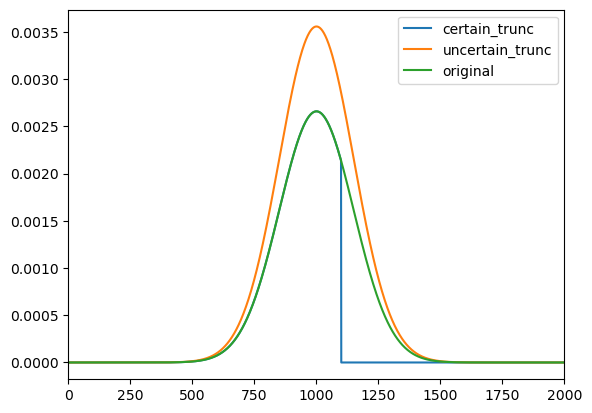

In [384]:
timesteps = np.arange(0,2000,1)
cut_off_a,cut_off_b = -2000,1100
mu,sig = 1000,150
original_agent_pdf = stats.norm.pdf(timesteps,mu,sig)
a, b = (cut_off_a - mu)/sig, (cut_off_b - mu) / sig
trunc = truncnorm(timesteps,cut_off_a,cut_off_b,mu,sig)
pdf_certain = trunc.pdf()

fig,ax = plt.subplots()
ax.plot(timesteps,pdf_certain,label='certain_trunc')
pdf_uncertain = trunc.pdf_uncertain()
ax.plot(timesteps,pdf_uncertain,label='uncertain_trunc')
ax.set_xlim(0,2000)

time_pdf = stats.norm.pdf(timesteps,cut_off_b,70)
new = pdf_uncertain*time_pdf/(pdf_uncertain+time_pdf)
# ax.plot(timesteps,new)
ax.plot(timesteps,original_agent_pdf,label='original')
# ax.plot(timesteps,time_pdf)
ax.legend()


In [346]:
trunc.prob_less_0

0.6499500472400517

In [354]:
trunc.certan_prob

0.6554217416103242

3.275918640450298e-05 3.061756017497314e-05


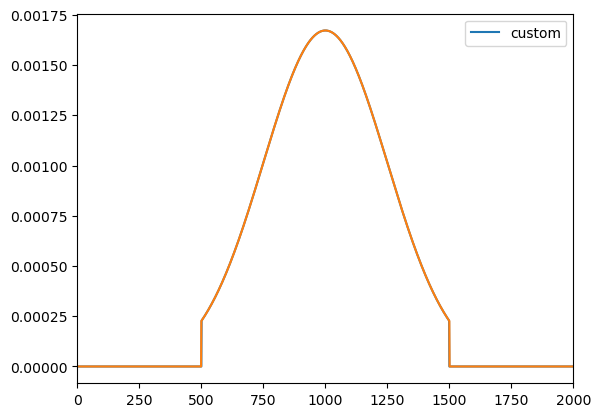

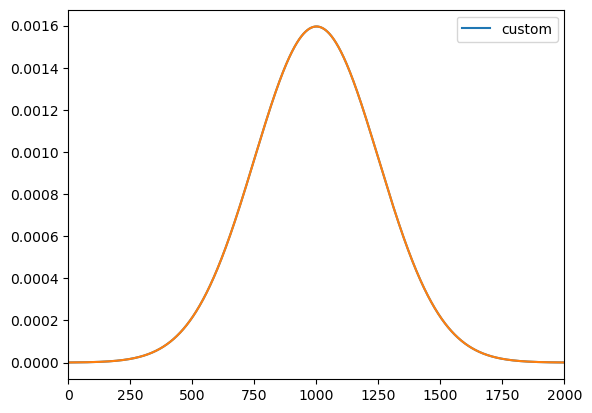

In [332]:
timesteps = np.arange(0,2000,1)
cut_off_a,cut_off_b = 500,1500
mu,sig = 1000,250
a, b = (cut_off_a - mu)/sig, (cut_off_b - mu) / sig
trunc = truncnorm(timesteps,cut_off_a,cut_off_b,mu,sig)
me = trunc.pdf()
me2 = trunc.norm_pdf()
them = stats.truncnorm.pdf(timesteps,a,b,mu,sig)
them2 = stats.norm.pdf(timesteps,mu,sig)
fig,ax = plt.subplots()
ax.plot(timesteps,me,label='custom')
ax.plot(timesteps,them)
ax.set_xlim(0,2000)
ax.legend()
fig,ax = plt.subplots()
ax.plot(timesteps,me2,label='custom')
ax.plot(timesteps,them2)
ax.set_xlim(0,2000)
ax.legend()

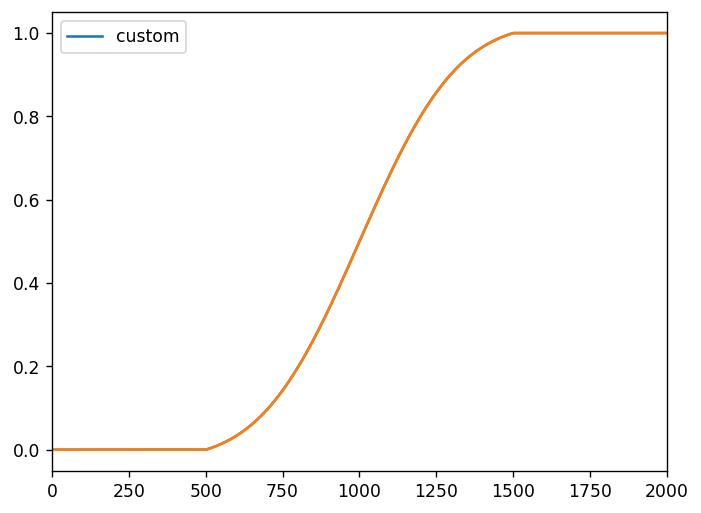

In [333]:
timesteps = np.arange(0,2000,1)
cut_off_a,cut_off_b = 500,1500
mu,sig = 1000,250
a, b = (cut_off_a - mu)/sig, (cut_off_b - mu) / sig

me = trunc.cdf()
them = stats.truncnorm.cdf(timesteps,a,b,mu,sig)
fig,ax = plt.subplots(dpi=124)
ax.plot(timesteps,me,label='custom')
ax.plot(timesteps,them)
ax.set_xlim(0,2000)
ax.legend()

Uncertain pdf

3.275918640450298e-05 3.061756017497314e-05
3.275918640450298e-05 3.061756017497314e-05


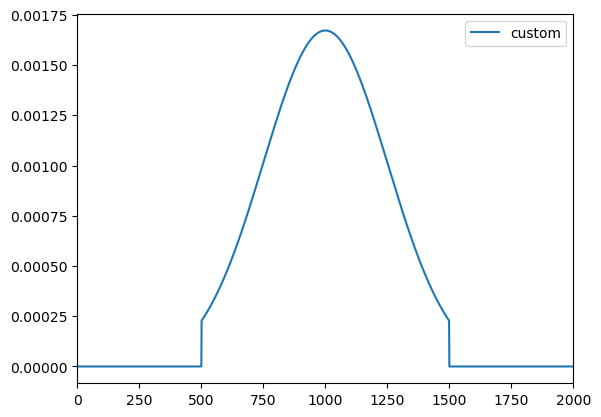

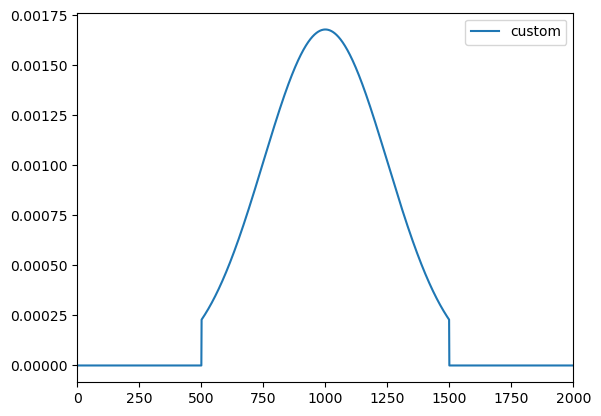

Instead of thinking about cutoff times, just get the distribution that gives the probability that the player cut off time will be greater than the agent's decision time

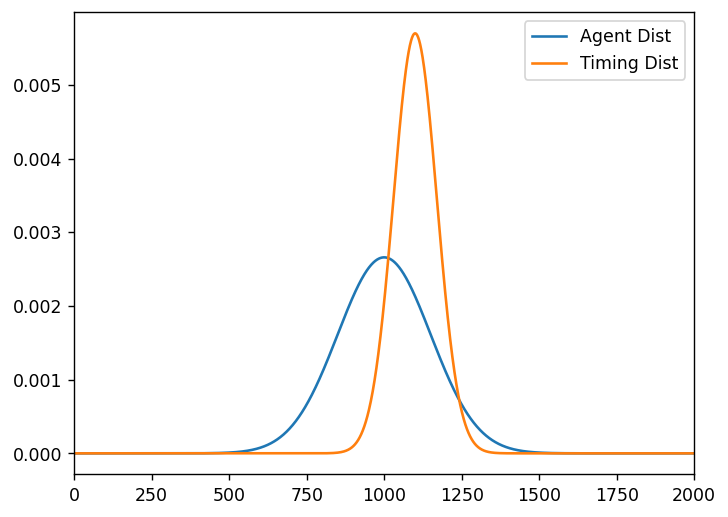

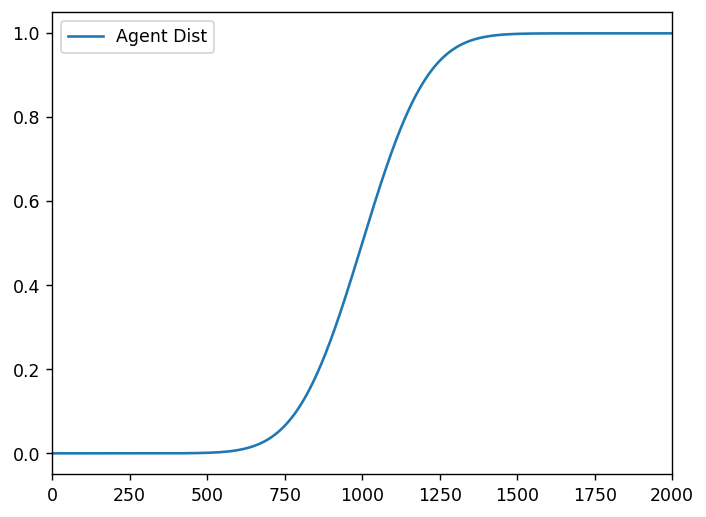

In [ ]:
timesteps = np.arange(0,2000,1)
mu,sd = 1000,150
agent_dist = stats.norm.pdf(timesteps,mu,sd)

cut_time = 1100
timing_dist = stats.norm.pdf(timesteps,cut_time,70)

prob_greater = 1 - stats.norm.cdf(0,timesteps- mu,np.sqrt(sd**2+70**2))

fig,ax = plt.subplots(dpi=125)
ax.plot(timesteps,agent_dist,label='Agent Dist')
ax.plot(timesteps,timing_dist,label='Timing Dist')

ax.set_xlim(0,2000)

ax.legend()
plt.show()
fig,ax = plt.subplots(dpi=125)
ax.plot(timesteps,prob_greater,label='Prob Greater Each Timestep')
ax.set_xlim(0,2000)

ax.legend()
plt.show()



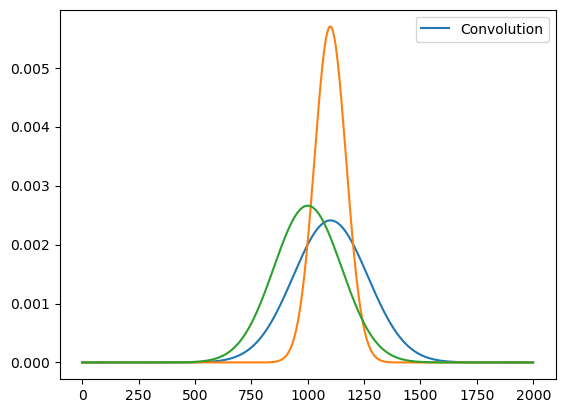

In [ ]:
conv = signal.fftconvolve(agent_dist,timing_dist,mode='same')
conv2= signal.fftconvolve(timing_dist,agent_dist)
fig,ax = plt.subplots()
ax.plot(conv,label='Convolution')
ax.plot(timesteps,timing_dist)
# ax.plot(agent_dist*timing_dist/np.sum(agent_dist*timing_dist))
ax.plot(timesteps,agent_dist)
ax.legend()

Cut off with certain cut off time

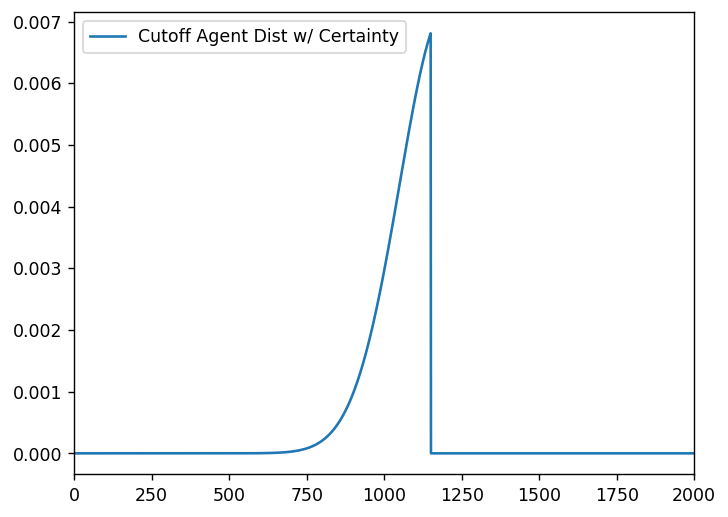

In [ ]:
t = np.arange(0,2000,1)
cut_off_a =-np.inf
cut_off_b = 1150

mu,sd = 1200,150
a, b = (cut_off_a - mu)/sd, (cut_off_b - mu) / sd
norm_pdf = stats.norm.pdf(t,mu,sd)
cutoff_pdf_certain = stats.truncnorm.pdf(t,a,b,loc=mu,scale=sd) 
timing_pdf = stats.norm.pdf(t,)

fig,ax = plt.subplots(dpi=125)
ax.plot(t,cutoff_pdf_certain,label='Cutoff Agent Dist w/ Certainty')
ax.set_xlim(0,2000)

ax.legend()
plt.show()

In [ ]:
x = stats.truncnorm.stats(a,b,loc=mu,scale=sd) 
x

(array(1046.77544715), array(6683.46404621))

Simulating 10000 truncnorm pdfs with the cut off time as the random variable

In [ ]:
iterations = 10000
every_pdf = np.zeros((iterations,len(t)))
cut_off_b_rvs = stats.norm.rvs(cut_off_b,70,iterations)
a, b_rvs = (cut_off_a - mu)/sd, (cut_off_b_rvs - mu) / sd
for i in range(iterations):
    every_pdf[i,:] = stats.truncnorm.pdf(t,a,b_rvs[i],loc=mu,scale=sd)

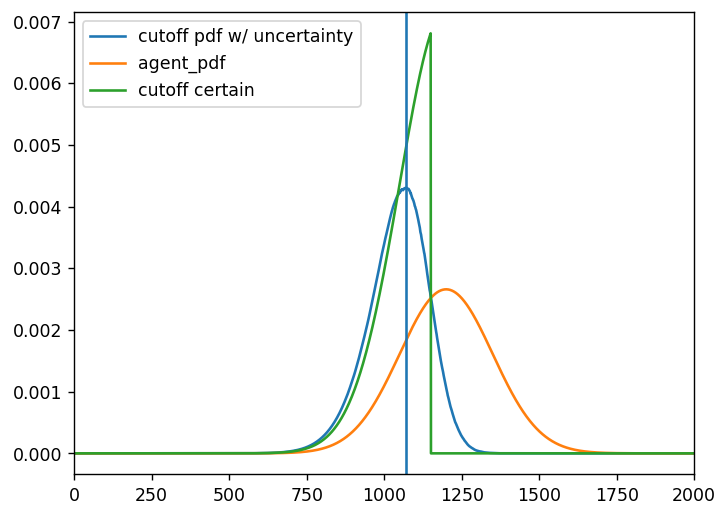

1069

In [ ]:
cutoff_pdf_uncertain = np.mean(every_pdf,axis=0)
timing_pdf_at_cutoff = stats.norm.pdf(t,cut_off_b,70) # Likelihood
fig,ax = plt.subplots(dpi=125)
ax.plot(t,cutoff_pdf_uncertain,label='cutoff pdf w/ uncertainty')
ax.plot(t,norm_pdf,label='agent_pdf')
ax.plot(t,cutoff_pdf_certain,label='cutoff certain')
# ax.plot(t,timing_pdf_at_cutoff,label='timing pdf')
# ax.plot(t,pdf)
# for i in range(100):
#     ax.plot(t,every_pdf[i,:])
ax.set_xlim(0,2000)
# ax.axvline(x=1046)
ax.axvline(x=np.argmax(cutoff_pdf_uncertain))
ax.legend()
plt.show()
np.argmax(cutoff_pdf_uncertain)

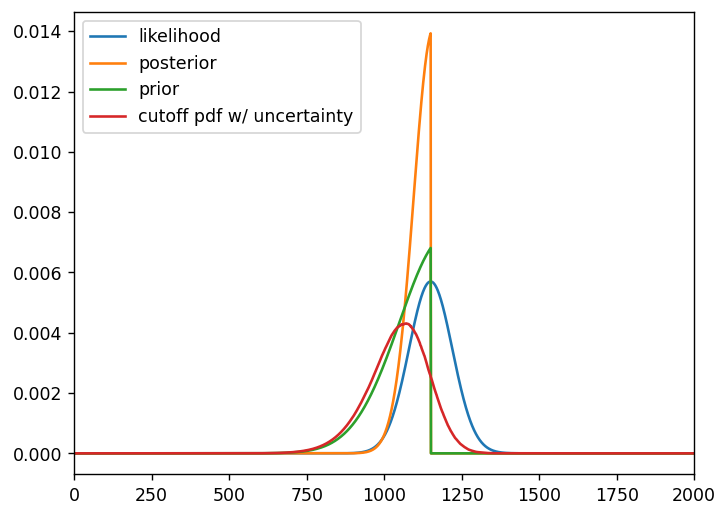

In [ ]:
agent_pdf = stats.norm.pdf(t,mu,sd) # Prior
timing_pdf_at_cutoff = stats.norm.pdf(t,cut_off_b,70) # Likelihood
like = timing_pdf_at_cutoff
prior = cutoff_pdf_certain
like_norm = like/np.sum(like)
prior_norm = prior/np.sum(prior)
posterior = (like_norm*prior_norm)/np.sum(like_norm*prior_norm)
# cutoff_cdf_certain = stats.truncnorm.cdf(t,a,b,mu,sd)
fig,ax = plt.subplots(dpi=125)
ax.plot(t,like,label='likelihood')
# ax.plot(t,agent_pdf,label='agent')
ax.plot(t,posterior,label='posterior')
ax.plot(t,prior,label='prior')
ax.plot(t,cutoff_pdf_uncertain,label='cutoff pdf w/ uncertainty')
ax.set_xlim(0,2000)
ax.legend()
plt.show()



Convolution of hard cut off and soft cut off with reaction movement time

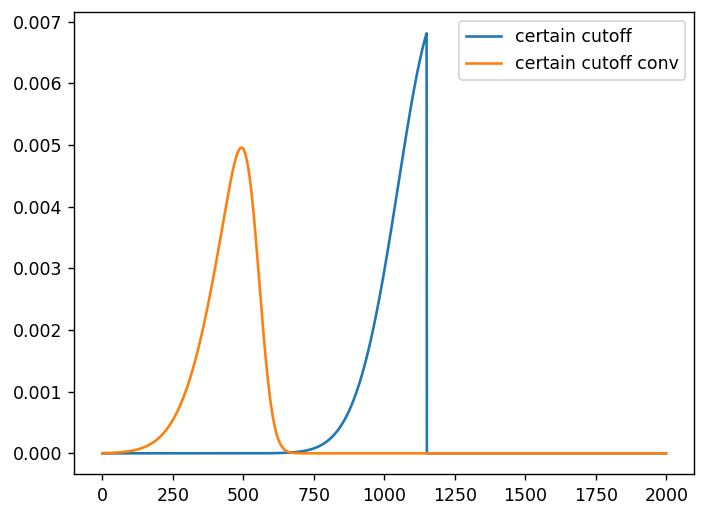

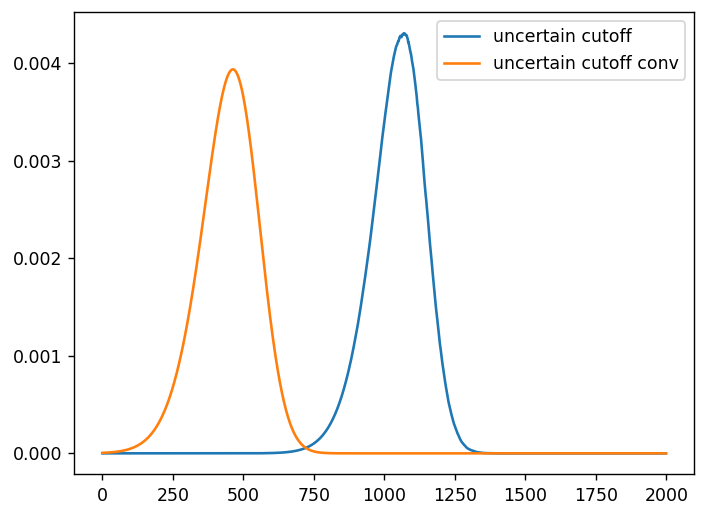

In [ ]:
dx=1
rmt = stats.norm.pdf(t,400,40)
hard_rmt = signal.fftconvolve(cutoff_pdf_certain,rmt,mode='same') * dx
soft_rmt = signal.fftconvolve(cutoff_pdf_uncertain,rmt,mode = 'same')* dx
fig,ax = plt.subplots(dpi=125)
ax.plot(cutoff_pdf_certain,label='certain cutoff')
ax.plot(hard_rmt,label='certain cutoff conv')
ax.legend()
# ax.set_xlim(0,2000)
plt.show()

fig,ax = plt.subplots(dpi=125)
ax.plot(cutoff_pdf_uncertain,label='uncertain cutoff')
ax.plot(soft_rmt,label='uncertain cutoff conv')
ax.legend()
# ax.set_xlim(0,2000)
plt.show()

In [ ]:
# def screw_you_john(params):
#     pdf_params = stats.truncnorm.logpdf(t,a,b,params[0],params[1])
#     true_pdf = stats.truncnorm.logpdf(t,a,b,mu,sd)
#     mae = np.sum(np.abs(pdf_params-true_pdf))
#     if params[1]<0:
#         return 1e6
#     return mae
    
def screw_you_john(params):
    pdf_params = stats.skewnorm.pdf(t,params[0],params[1],params[2])
    true_pdf = cutoff_pdf_certain
    mse = np.sum(np.abs(pdf_params-true_pdf))
    if params[1]<0:
        return 1e6
    return mse

In [ ]:
init_skew,init_mean,init_sd = 2,100,50
optim = optimize.minimize(screw_you_john,[init_skew,init_mean,init_sd],method='Powell',options = {"maxiter": 100,"maxfev": 1e3, "ftol": .00000000001, "disp": True})

Optimization terminated successfully.
         Current function value: 1.003406
         Iterations: 2
         Function evaluations: 191


In [ ]:
optim.x

array([-3.39122652e-01,  2.77639589e+00,  2.33086507e+12])

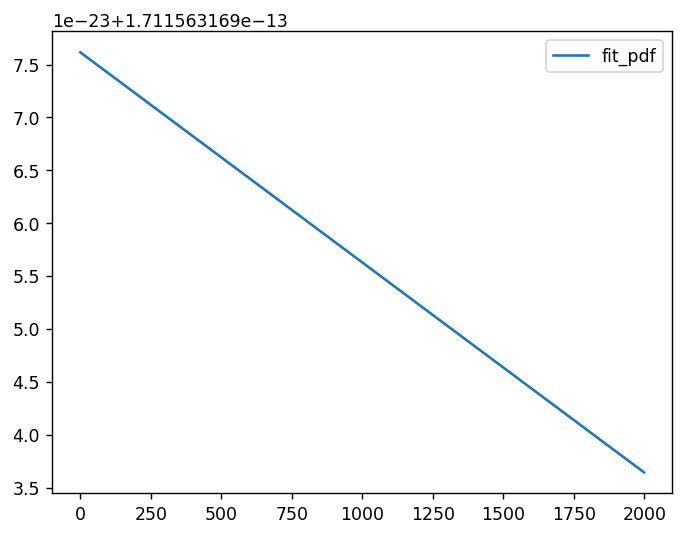

In [ ]:
fit_pdf = stats.skewnorm.pdf(t,optim.x[0],optim.x[1],optim.x[2])
true_pdf = cutoff_pdf_uncertain

plt.show()
fig,ax = plt.subplots(dpi=125)
# ax.plot(true_pdf,label='true_pdf')
ax.plot(fit_pdf,label='fit_pdf')
ax.legend()

In [ ]:
cutoff_pdf_uncertain[0]

1.1495364442687757e-16

Create custom distribution and then sample and then use skewnorm.fit() on the sample data

In [ ]:
class uncertain_truncation(stats.rv_discrete):
    def _pdf(self,x):
        return cutoff_pdf_uncertain[x]
    

In [ ]:
dist = uncertain_truncation()
# dist.rvs()